# Arc diagram
inspiration: https://python-graph-gallery.com/565-arc-diagram-with-arcplot/

In [1]:
import pandas as pd

from arcplot import ArcDiagram

In [2]:
# Creating simple example
data_simple = {
    'from': [0, 0, 0, 0, 0, 2, 5, 5],
    'to': [1, 2, 3, 4, 5, 3, 3, 1],
    'weights': [4, 2, 1, 1, 0.5, 5, 0.5, 0.5],
}

df_simple = pd.DataFrame(data_simple)

In [3]:
# Creating more complitated example 
data_complex = {
    'from': [0, 0, 0, 0, 0, 0, 1, 1, 1, 3, 3, 3, 3, 5, 5, 6, 7, 8, 8, 10, 10, 10],
    'to': [1, 2, 3, 4, 5, 10, 5, 8, 10, 4, 6, 7, 8, 2, 8, 1, 3, 2, 3, 4, 6, 8],
    'weights': [4, 3, 2, 1, 1, 1, 2, 2, 2, 4, 2, 2, 1, 2, 1, 1, 1, 3, 2, 1, 2, 5],
}

df_complex = pd.DataFrame(data_complex)

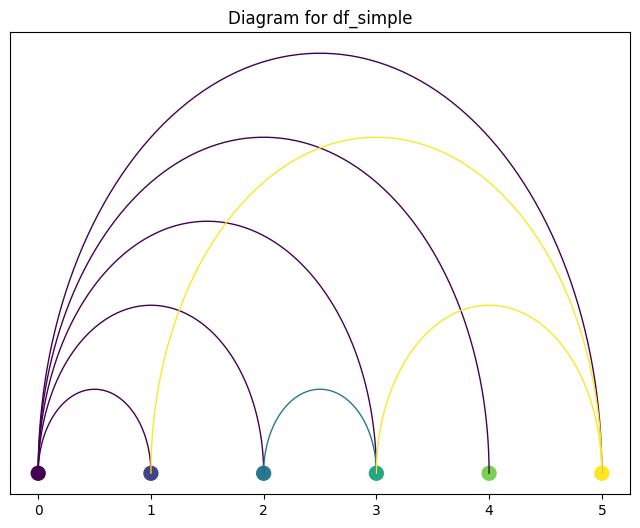

In [4]:
def createArcDiagram(df, node_from = 'from', node_to = 'to', title='Just a diagram'):
    # get all the nodes
    nodes = df[node_from].unique().tolist() + df[node_to].unique().tolist()
    nodes = list(set(nodes))

    # create the diagram with title and nodes
    arcdiag = ArcDiagram(nodes, title)

    # connect the nodes
    for connection in df.iterrows():
        arcdiag.connect(connection[1][node_from], connection[1][node_to])
    
    # plot the diagram
    arcdiag.show_plot()
    
createArcDiagram(
    df_simple,
    title='Diagram for df_simple'
)

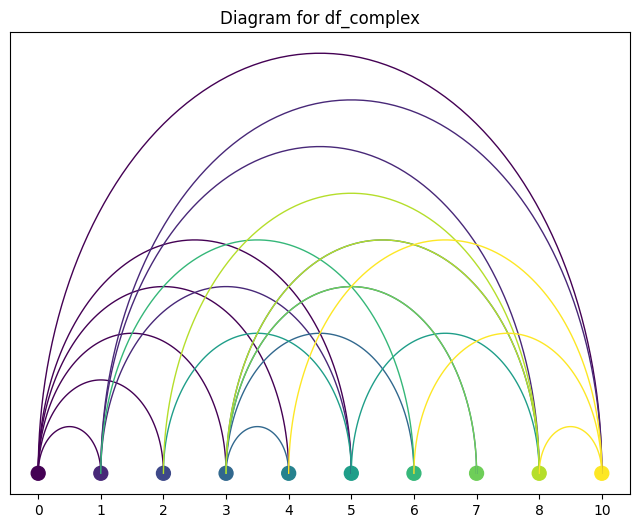

In [5]:
createArcDiagram(
    df_complex,
    title='Diagram for df_complex'
)

### adding weight and color

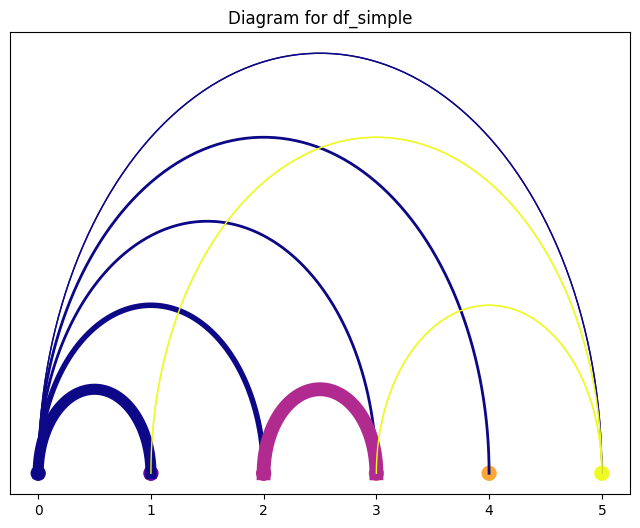

In [6]:
def createArcDiagram_v2(df, node_from = 'from', node_to = 'to', weights = 'weights', 
                        title='Just a diagram', cmap='viris'):
    # get all the nodes
    nodes = df[node_from].unique().tolist() + df[node_to].unique().tolist()
    nodes = list(set(nodes))

    # create the diagram with title and nodes
    arcdiag = ArcDiagram(nodes, title)

    # connect the nodes
    for connection in df.iterrows():
        arcdiag.connect(connection[1][node_from], connection[1][node_to])

    if not weights:
        df['weights'] = 0.1

    # connect the nodes
    for connection in df.iterrows():
        arcdiag.connect(
            connection[1][node_from],
            connection[1][node_to],
            linewidth=connection[1][weights]
        )

    # custom colors
    arcdiag.set_color_map(cmap)
    
    # plot the diagram
    arcdiag.show_plot()

createArcDiagram_v2(
    df_simple,
    title='Diagram for df_simple',
    cmap='plasma'
)

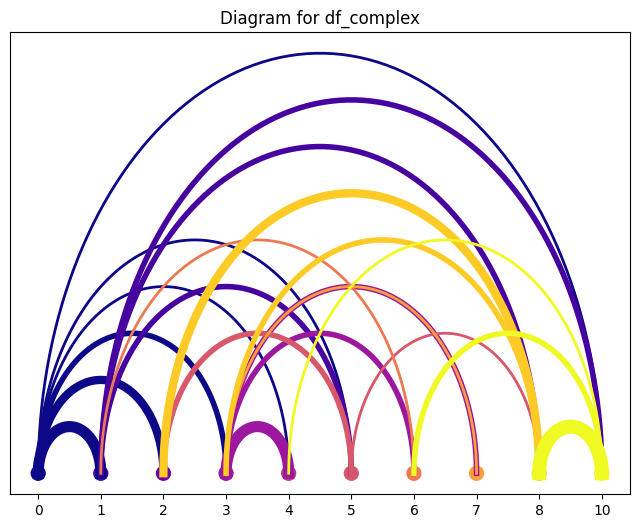

In [7]:
createArcDiagram_v2(
    df_complex,
    title='Diagram for df_complex',
    cmap='plasma'
)